# Injection Rate vs Accident Probability Analysis

This notebook studies the incidence of injection rate (α) on accident probability for different lane change probabilities (p_chg).

## Import Libraries and Setup

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add parent directory to path to import project modules
sys.path.insert(0, os.path.abspath('..'))

from dispatcher import SimulationDispatcher, generate_parameter_grid

# Set seaborn theme for consistent styling
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.dpi'] = 100

## Simulation Parameters

We fix the following parameters:
- Road length: 200
- Maximum velocity (vmax): 4
- Random braking probability (p_b): 0.1
- Red light violation probability (p_red): 0.1
- Skid probability (p_skid): 0
- Green light period (t_green): 40

We vary:
- Injection rate (α): 20 values from 0.05 to 1.0
- Lane change probability (p_chg): {0, 0.02, 0.1, 1}

In [5]:
# Fixed parameters
LENGTH = 200
VMAX = 4
P_B = 0.1
P_RED = 0.1
P_SKID = 0.05
T_GREEN = 40
STEPS = 100000
REPLICATIONS = 5

# Variable parameters
injection_rates = np.linspace(0.05, 1.0, 20)
p_chg_values = [0.0, 0.02, 0.1, 1.0]

print(f"Number of injection rate values: {len(injection_rates)}")
print(f"Injection rates: {injection_rates}")
print(f"p_chg values: {p_chg_values}")
print(f"Number of replications per configuration: {REPLICATIONS}")
print(f"Total simulations: {len(injection_rates) * len(p_chg_values) * REPLICATIONS}")

Number of injection rate values: 20
Injection rates: [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
p_chg values: [0.0, 0.02, 0.1, 1.0]
Number of replications per configuration: 5
Total simulations: 400


## Generate Simulation Configurations

In [6]:
# Generate all parameter combinations
configs = generate_parameter_grid(
    length_values=[LENGTH],
    vmax_values=[VMAX],
    t_green_values=[T_GREEN],
    injection_rate_values=injection_rates.tolist(),
    p_b_values=[P_B],
    p_chg_values=p_chg_values,
    p_red_values=[P_RED],
    p_skid_values=[P_SKID],
    steps=STEPS,
    metrics_start_step=0,
    replications=REPLICATIONS
)

print(f"Generated {len(configs)} simulation configurations")
print(f"\nFirst configuration:")
print(configs[0])

output_file = "injection_test.csv"

Generated 400 simulation configurations

First configuration:
SimulationConfig(length=200, vmax=4, t_green=40, injection_rate=0.05, p_b=0.1, p_chg=0.0, p_red=0.1, p_skid=0.05, steps=100000, metrics_start_step=0, config_id=0)


## Run Simulations

This will take some time. The dispatcher will run all simulations in parallel and save results to a CSV file.

In [ ]:
# Create dispatcher and run simulation

dispatcher = SimulationDispatcher(
    output_file=output_file,
    use_multiprocessing=True,
    max_workers=None,  # Use all available CPU cores
    verbose=True
)

# Run all simulations
results = dispatcher.run(configs)

print(f"\nSimulations complete! Results saved to {output_file}")

Starting 4000 simulations...
Using multiprocessing
Max workers: 20
Results will be saved to: injection_test.csv
--------------------------------------------------------------------------------
[1/4000] Completed config_id=17 | Elapsed: 9.2s | ETA: 36967.6s
[2/4000] Completed config_id=19 | Elapsed: 9.4s | ETA: 18716.9s
[3/4000] Completed config_id=2 | Elapsed: 10.1s | ETA: 13490.4s
[4/4000] Completed config_id=6 | Elapsed: 10.2s | ETA: 10150.7s
[5/4000] Completed config_id=0 | Elapsed: 10.3s | ETA: 8248.2s
[6/4000] Completed config_id=4 | Elapsed: 10.3s | ETA: 6873.8s
[7/4000] Completed config_id=5 | Elapsed: 10.3s | ETA: 5894.4s
[8/4000] Completed config_id=16 | Elapsed: 10.9s | ETA: 5460.4s
[9/4000] Completed config_id=11 | Elapsed: 11.3s | ETA: 4991.7s
[10/4000] Completed config_id=13 | Elapsed: 11.7s | ETA: 4664.4s
[11/4000] Completed config_id=12 | Elapsed: 11.8s | ETA: 4273.0s
[12/4000] Completed config_id=3 | Elapsed: 11.9s | ETA: 3956.2s
[13/4000] Completed config_id=1 | Elapse

## Load and Process Results

In [7]:
# Load results from CSV
df = pd.read_csv(output_file)

# Display basic info
print(f"Total rows: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Total rows: 400

Columns: ['timestamp', 'config_id', 'length', 'vmax', 't_green', 'injection_rate', 'p_b', 'p_chg', 'p_red', 'p_skid', 'steps', 'metrics_start_step', 'n_lateral', 'n_rear_end', 'n_vehicles', 'throughput', 'lateral_to_rear_end_ratio', 'time', 'total_time', 'completed_vehicles', 'avg_travel_time', 'avg_speed']

First few rows:


,timestamp,config_id,length,vmax,t_green,injection_rate,p_b,p_chg,p_red,p_skid,...,n_lateral,n_rear_end,n_vehicles,throughput,lateral_to_rear_end_ratio,time,total_time,completed_vehicles,avg_travel_time,avg_speed
0,2025-11-10T12:20:11.454976,18,200,4,40,0.05,0.1,1.0,0.1,0.005,...,99,9,2007,1975,11.000000,11.056832,11.056981,1970,57.182741,17.354238
1,2025-11-10T12:20:11.482922,15,200,4,40,0.05,0.1,1.0,0.1,0.005,...,95,7,1969,1949,13.571429,11.085258,11.085392,1944,57.525720,17.586260
2,2025-11-10T12:20:11.497871,16,200,4,40,0.05,0.1,1.0,0.1,0.005,...,105,6,1948,1925,17.500000,11.100130,11.100274,1917,57.297861,17.844467
3,2025-11-10T12:20:11.545632,17,200,4,40,0.05,0.1,1.0,0.1,0.005,...,99,5,2018,1988,19.800000,11.147827,11.147964,1984,57.669859,17.109496
4,2025-11-10T12:20:11.581546,19,200,4,40,0.05,0.1,1.0,0.1,0.005,...,106,5,2022,1995,21.200000,11.183037,11.183169,1991,57.787042,17.083398


## Calculate Accident Probability

The accident probability (P_acc) is calculated as:

$$P_{acc} = \frac{\text{Number of accidents}}{\text{Time steps} \times \text{Throughput}}$$

Where:
- Number of accidents = n_lateral + n_rear_end (total accidents)
- Time steps = simulation steps
- Throughput = number of cars that passed through the intersection

In [13]:
# Calculate total accidents and accident probability
df['total_accidents'] = df['n_lateral'] + df['n_rear_end']

# P_acc = Number of accidents / (Time steps * Throughput)
# Avoid division by zero
df['p_acc'] = df.apply(
    lambda row: row['total_accidents'] / (row['n_vehicles']) 
    if row['n_vehicles'] > 0 else 0, 
    axis=1
)

# Display sample calculations
print("Sample calculations:")
print(df[['injection_rate', 'p_chg', 'total_accidents', 'steps', 'n_vehicles', 'p_acc']].head(10))

Sample calculations:
   injection_rate  p_chg  total_accidents   steps  n_vehicles     p_acc
0            0.05    1.0              108  100000        2007  0.053812
1            0.05    1.0              102  100000        1969  0.051803
2            0.05    1.0              111  100000        1948  0.056982
3            0.05    1.0              104  100000        2018  0.051536
4            0.05    1.0              111  100000        2022  0.054896
5            0.05    0.1              120  100000        1975  0.060759
6            0.05    0.1               94  100000        1949  0.048230
7            0.05    0.1              106  100000        2060  0.051456
8            0.05    0.1              105  100000        2048  0.051270
9            0.05    0.1              122  100000        1963  0.062150


## Aggregate Results

Average the accident probability across all replications for each combination of injection_rate and p_chg.

In [14]:
# Group by injection_rate and p_chg, then calculate mean and std
aggregated = df.groupby(['injection_rate', 'p_chg']).agg({
    'p_acc': ['mean', 'std', 'count'],
    'n_vehicles': 'mean',
    'total_accidents': 'mean'
}).reset_index()

# Flatten column names
aggregated.columns = ['injection_rate', 'p_chg', 'p_acc_mean', 'p_acc_std', 'n_replications', 'n_vehicles_mean', 'accidents_mean']

print(f"Aggregated data shape: {aggregated.shape}")
print(f"\nSample aggregated data:")
aggregated.head(10)

Aggregated data shape: (80, 7)

Sample aggregated data:


,injection_rate,p_chg,p_acc_mean,p_acc_std,n_replications,n_vehicles_mean,accidents_mean
0,0.05,0.00,0.062025,0.011125,5,1981.8,122.6
1,0.05,0.02,0.056787,0.004093,5,1983.0,112.6
2,0.05,0.10,0.054773,0.006252,5,1999.0,109.4
3,0.05,1.00,0.053806,0.002260,5,1992.8,107.2
4,0.10,0.00,0.118400,0.006161,5,3878.8,459.2
5,0.10,0.02,0.116360,0.008233,5,3880.8,451.6
6,0.10,0.10,0.111344,0.008418,5,3861.2,429.6
7,0.10,1.00,0.116843,0.004962,5,3941.2,460.4
8,0.15,0.00,0.176893,0.002491,5,5786.0,1023.6
9,0.15,0.02,0.174708,0.003288,5,5751.6,1004.8


## Create Plot: P_acc vs α for Different p_chg Values

This plot replicates the reference figure showing how accident probability varies with injection rate for different lane change probabilities.

Plot saved as 'injection_rate_plot.png'


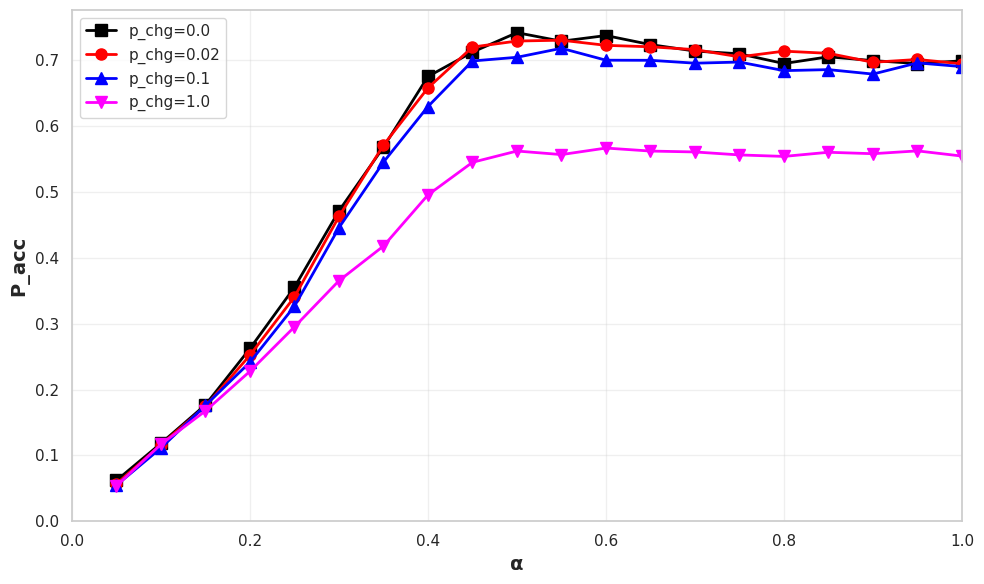

In [15]:
# Create the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for each p_chg value
markers = ['s', 'o', '^', 'v']
colors = ['black', 'red', 'blue', 'magenta']

# Plot each p_chg value as a separate line
for i, p_chg in enumerate(p_chg_values):
    data = aggregated[aggregated['p_chg'] == p_chg]
    
    plt.plot(
        data['injection_rate'], 
        data['p_acc_mean'],
        marker=markers[i],
        color=colors[i],
        linestyle='-',
        linewidth=2,
        markersize=8,
        label=f'p_chg={p_chg}',
        markerfacecolor=colors[i],
        markeredgecolor=colors[i]
    )

# Formatting
plt.xlabel('α', fontsize=14, fontweight='bold')
plt.ylabel('P_acc', fontsize=14, fontweight='bold')
plt.xlim(0, 1.0)
plt.ylim(bottom=0)
plt.legend(loc='best', frameon=True, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the figure
plt.savefig('injection_rate_plot.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'injection_rate_plot.png'")

plt.show()

## Summary Statistics

Display some key statistics about the results.

In [17]:
# Find peak accident probability for each p_chg
print("Peak accident probability (P_acc) for each p_chg value:\n")
for p_chg in p_chg_values:
    data = aggregated[aggregated['p_chg'] == p_chg]
    max_idx = data['p_acc_mean'].idxmax()
    max_row = data.loc[max_idx]
    
    print(f"p_chg = {p_chg}:")
    print(f"  Maximum P_acc = {max_row['p_acc_mean']:.6f} at α = {max_row['injection_rate']:.3f}")
    print(f"  N_vehicles = {max_row['n_vehicles_mean']:.1f}")
    print(f"  Accidents = {max_row['accidents_mean']:.2f}")
    print()

# Overall statistics
print("\nOverall statistics:")
print(f"Total simulations run: {len(df)}")
print(f"Total unique configurations: {len(aggregated)}")
print(f"Replications per configuration: {REPLICATIONS}")
print(f"Injection rate range: [{injection_rates.min():.2f}, {injection_rates.max():.2f}]")
print(f"p_chg values tested: {p_chg_values}")

Peak accident probability (P_acc) for each p_chg value:

p_chg = 0.0:
  Maximum P_acc = 0.742169 at α = 0.500
  N_vehicles = 15285.0
  Accidents = 11343.60

p_chg = 0.02:
  Maximum P_acc = 0.730732 at α = 0.550
  N_vehicles = 16088.8
  Accidents = 11756.60

p_chg = 0.1:
  Maximum P_acc = 0.718433 at α = 0.550
  N_vehicles = 16111.0
  Accidents = 11574.80

p_chg = 1.0:
  Maximum P_acc = 0.566884 at α = 0.600
  N_vehicles = 17316.4
  Accidents = 9816.20


Overall statistics:
Total simulations run: 400
Total unique configurations: 80
Replications per configuration: 5
Injection rate range: [0.05, 1.00]
p_chg values tested: [0.0, 0.02, 0.1, 1.0]


## Interpretation

The plot shows how the accident probability (P_acc) varies with the injection rate (α) for different lane change probabilities (p_chg):

1. **Curve Shape**: For most p_chg values, P_acc follows a characteristic pattern:
   - Increases with α at low injection rates
   - Reaches a maximum at intermediate injection rates
   - Decreases at very high injection rates (saturation regime)

2. **Effect of p_chg**: Higher lane change probabilities generally lead to higher accident probabilities, as more lane changes create more opportunities for conflicts.

3. **Saturation Effect**: At very high injection rates (α → 1), the road becomes saturated with vehicles, which actually reduces the accident probability per vehicle because vehicles are forced to move more slowly.

4. **Critical Injection Rate**: Each p_chg value has a critical injection rate where accidents are most likely, representing the transition between free-flow and congested traffic regimes.